In [1]:
import csv
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

#### Read the file
Skipping irrelevant data: death date not within the expected year and pages created after the beginning of the year (to filter out the bias of posthumous pages creation)

In [2]:
def read_file(year):
    d = []
    filename = "deaths{}.csv".format(year)
    with open(filename, 'r') as f:
        r = csv.reader(f)
        for row in r:
            if row[0]=='Name': continue
            name = row[0]
            birth = date.fromisoformat(row[1])
            death = date.fromisoformat(row[2])
            covid = (row[3] == 'True')
            created = date.fromisoformat(row[4])
            if death < date(year,1,1) or death >=date(year+1,1,1):
                print ("Page {} weird death date {}".format(name, death))
                continue
            if created >= date(year,1,1):
                #print ("Page {} created too late: {}".format(name, death))
                continue
            d.append([name,birth,death,covid,created])
    return d

In [3]:
d2020 = read_file(2020)

Page Iryna Bekeshkina weird death date 2010-03-20
Page Glenn Steil Sr. weird death date 2010-05-07
Page Mian Muhammad Afzal Hayat weird death date 1997-02-20
Page Murad Wilfried Hofmann weird death date 2019-12-20
Page Stanislav Libenský and Jaroslava Brychtová weird death date 2002-02-24
Page Del Martin and Phyllis Lyon weird death date 2008-08-27
Page Étienne Périer (director) weird death date 2010-06-21
Page Kiing Shooter weird death date 2019-12-20
Page Jim Janssen van Raaij weird death date 2010-02-11


In [4]:
def hist_death(data, start_day, end_day=None, filt=None):
    if not filt: filt = lambda _: True
    if not end_day: end_day = date(start_day.year+1,1,1)
    num_days = (end_day-start_day).days
    dates = [start_day+timedelta(days=j) for j in range(num_days)]
    count = np.zeros(num_days)
    for row in data:
        if not filt(row):
            continue
        j=(row[2]-start_day).days
        if j<0 or j>=num_days:
            continue
        count[j]+=1
    return dates, count

In [21]:
end_day = date(2020,12,31)  # Skip Dec 31 to make a 365 day year
start_day = date(2020,1,1)
dates2020, count_2020 = hist_death(d2020, start_day, end_day)
_, cvd2020 = hist_death(d2020, start_day, end_day, lambda row: row[3])

In [16]:
def ma(x, win=7):
    w = np.ones(win)/win
    return np.convolve(x, w, 'valid')
ma2020 = ma(count_2020)

In [8]:
d2019 = read_file(2019)

Page Bettina F. Bradbury weird death date 2006-01-20
Page Dave Maynard weird death date 2012-02-12
Page Susan Irvine weird death date 2013-08-05
Page Lev Kolodub weird death date 1977-03-30
Page Sushil Kumar (admiral) weird death date 2001-12-29
Page Anilkumar Patel weird death date 2018-02-08
Page Ehsan-ul-Haq Piracha weird death date 1990-12-06
Page Augie and Margo Rodriguez weird death date 2014-07-18
Page Marv Terhoch weird death date 1981-05-31
Page Ed and Lorraine Warren weird death date 2006-08-23
Page Allen S. Whiting weird death date 2018-01-11
Page Bill K. Williams weird death date 2005-01-18


In [9]:
dates2019, count2019 = hist_death(d2019, date(2019,1,1))
ma2019 = ma(count2019)

In [10]:
d2021 = read_file(2021)
end_day = date(2021,5,18)
start_day = date(2021,1,1)
dates2021, count_2021 = hist_death(d2021, start_day, end_day)
ma2021 = ma(count_2021)
_,cvd2021 = hist_death(d2021, start_day, end_day, lambda row: row[3])

Page Oscar Albarado weird death date 1975-01-21
Page Mary Dann and Carrie Dann weird death date 2005-04-22
Page Laurindo Guizzardi weird death date 2020-02-22
Page Riyaz Punjabi weird death date 2011-06-01
Page Syed Yahya Shah weird death date 1940-03-17
Page David Thompson (British businessman) weird death date 2020-12-29


#### Plotting daily mortality
`All` - all deaths; `COVID` - deaths with COVID or coronavirus mentioned; `Base` - non-COVID deaths; 2019 - corresponding data from 2019 for comparison.
The solid lines are 7 day moving average.

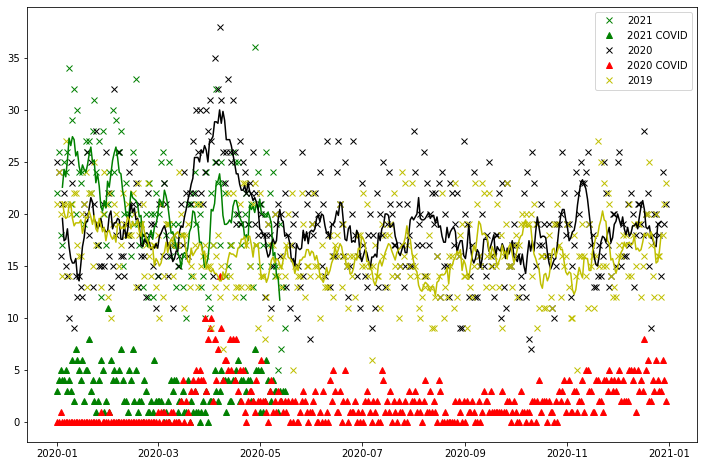

In [22]:
plt.figure(figsize=(12,8))
plt.plot_date(dates2020[:len(count_2021)], count_2021, 'gx')
plt.plot_date(dates2020[:len(count_2021)], cvd2021, 'g^')
plt.plot_date(dates2020, count_2020, 'kx')
plt.plot_date(dates2020, cvd2020, 'r^')
plt.plot_date(dates2020, count2019, 'yx')
plt.plot_date(dates2020[3:len(count_2021)-3], ma2021, 'g-')
plt.plot_date(dates2020[3:-3], ma2020, 'k-')
plt.plot_date(dates2020[3:-3], ma2019, 'y-')
plt.legend(['2021', '2021 COVID', '2020', '2020 COVID', '2019'])

In [24]:
(np.sum(cvd2020) + np.sum(cvd2021))/(np.sum(count_2020)+np.sum(count_2021))

0.11482362677149063

In [25]:
ages = [(row[2] - row[1])/timedelta(days=365.25) for row in d2020+d2021]
ages_no = [(row[2] - row[1])/timedelta(days=365.25) for row in d2020+d2021 if not row[3]]
ages_cvd = [(row[2] - row[1])/timedelta(days=365.25) for row in d2020+d2021 if row[3]]
ages2019 =  [(row[2] - row[1])/timedelta(days=365.25) for row in d2019]

#### Age at death histogram
Blue = all deaths; orange = COVID deaths

(array([0.        , 0.        , 0.00017986, 0.00017986, 0.        ,
        0.00053957, 0.00089928, 0.00089928, 0.00305755, 0.00323741,
        0.00521583, 0.01169065, 0.01600719, 0.01870504, 0.02931655,
        0.02877698, 0.02841727, 0.02661871, 0.01726619, 0.00665468,
        0.00215827, 0.00017986]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110.]),
 [<matplotlib.patches.Polygon at 0x7f84e06809d0>])

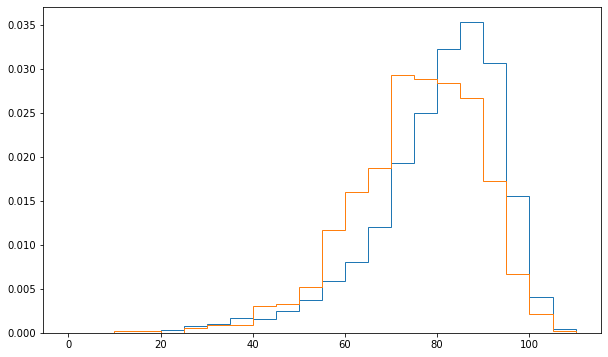

In [26]:
plt.figure(figsize=(10,6))
plt.hist(ages_no, bins=22, histtype='step', density=True, range=(0,110))
plt.hist(ages_cvd, bins=22, histtype='step', density=True, range=(0,110))

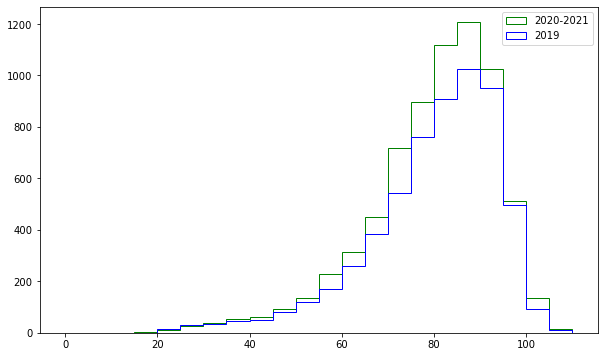

In [28]:
wt = len(count2019)/(len(count_2020)+len(count_2021))
plt.figure(figsize=(10,6))
h=plt.hist(ages, weights=np.ones(len(ages))*wt, bins=22, histtype='step', color='g', range=(0,110))
ho=plt.hist(ages2019, bins=22, histtype='step', color='b', range=(0,110))
plt.legend(['2020-2021', '2019'])

<BarContainer object of 22 artists>

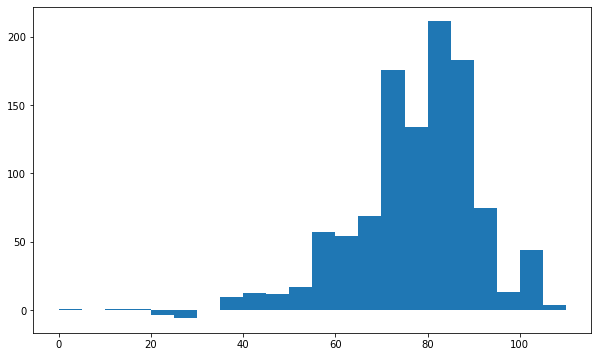

In [29]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(0,110,5),h[0]-ho[0], width=5, align='edge')

In [30]:
np.median(ages_no), np.median(ages_cvd), np.average(ages_no), np.average(ages_cvd)

(83.03353867214237, 76.46132785763176, 80.24846722261799, 75.47346106687546)

### Cumulative anomaly comparing to the 2017-2019 average since start of the year

In [31]:
d2018 = read_file(2018)
dates2018, count2018 = hist_death(d2018, date(2018,1,1))
d2017 = read_file(2017)
dates2017, count2017 = hist_death(d2017, date(2017,1,1))

Page Dugan Aguilar weird death date 2008-01-27
Page Scotty Bloch weird death date 2013-01-10
Page Peter Boakye-Ansah weird death date 2008-07-19
Page Pearl Carr & Teddy Johnson weird death date 2020-02-16
Page Edoardo Catellani weird death date 2019-07-10
Page John Conboy weird death date 2004-03-15
Page Rodolfo de la Garza weird death date 2019-08-05
Page Christa Dichgans weird death date 1997-02-26
Page Marianne Eigenheer weird death date 2012-02-11
Page Caroline Hebbe weird death date 1959-01-18
Page Billy Ray Irick weird death date 1985-04-16
Page Hans Joachim Keil III weird death date 2019-08-31
Page Margo McCaffery weird death date 2008-01-09
Page David Wynn Miller weird death date 2019-06-22
Page Özden Örnek weird death date 2005-08-26
Page Alice and Martin Provensen weird death date 1987-03-27
Page Robert Roripaugh weird death date 2019-01-02
Page Ian Spry weird death date 1994-05-28
Page Caleb Warner weird death date 2017-08-24
Page Theodor Bergmann (agronomist) weird death da

In [32]:
c2021 = np.cumsum(count_2021)
c2020 = np.cumsum(count_2020)
c2019 = np.cumsum(count2019)
c2018 = np.cumsum(count2018)
c2017 = np.cumsum(count2017)
print(c2017[-1], c2018[-1], c2019[-1], c2020[-1], c2021[-1])

5613.0 5780.0 5984.0 6881.0 2786.0


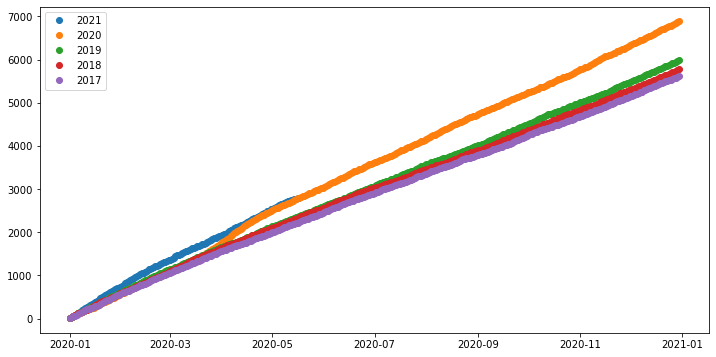

In [33]:
plt.figure(figsize=(12,6))
plt.plot_date(dates2020[:len(c2021)], c2021)
plt.plot_date(dates2020, c2020)
plt.plot_date(dates2020, c2019)
plt.plot_date(dates2020, c2018)
plt.plot_date(dates2020, c2017)
plt.legend(['2021', '2020', '2019', '2018', '2017'])

#### Same but trying to control against the corpus size

In [34]:
wp_size = np.array([5321200, 5541900, 5773600, 5989400, 6219700])
weight = wp_size[-1]/wp_size
print(weight)
cs2017, cs2018, cs2019, cs2020, cs2021 = c2017*weight[0], c2018*weight[1], c2019*weight[2], c2020*weight[3], c2021*weight[4]

[1.16885289 1.12230462 1.07726548 1.03845126 1.        ]


In [ ]:
plt.figure(figsize=(12,6))
csavg = (cs2019+cs2018+cs2017)/3.0
plt.plot_date(dates2020[:len(c2021)], cs2021 - csavg[:len(c2021)])
plt.plot_date(dates2020, cs2020-csavg)
plt.plot_date(dates2020, cs2019-csavg)
plt.plot_date(dates2020, cs2018-csavg)
plt.plot_date(dates2020, cs2017-csavg)
plt.legend(['2021', '2020', '2019', '2018', '2017'])

Doesn't look very good, probably the corpus growth for people is slower. Ok, let's assume there was a linear corpus growth (at scale of 10% linear doesn't significantly differ from exponential).

In [ ]:
f1,f0 = np.polyfit([2017,2018,2019], [c2017[-1],c2018[-1],c2019[-1]], deg=1)
eoy = f0+f1*np.array([2017,2018,2019,2020,2021])
print(eoy)
yearly = (c2019+c2018+c2017)/3.0 - eoy[1]*np.arange(365)/365
plt.figure(figsize=(12,6))
plt.plot_date(dates2020[:len(c2021)], c2021-eoy[4]*np.arange(len(c2021))/365-yearly[:len(c2021)])
plt.plot_date(dates2020, c2020-eoy[3]*np.arange(len(c2020))/365-yearly[:len(c2020)])
plt.plot_date(dates2020, c2019-eoy[2]*np.arange(365)/365-yearly)
plt.plot_date(dates2020, c2018-eoy[1]*np.arange(365)/365-yearly)
plt.plot_date(dates2020, c2017-eoy[0]*np.arange(365)/365-yearly)
plt.legend(['2021','2020','2019','2018','2017'])

In [ ]:
expected2020 = (c2019+c2018+c2017)/3.0 + 2*f1*np.arange(365)/365
plt.figure(figsize=(12,6))
plt.plot_date(dates2020,expected2020)
plt.plot_date(dates2020, c2020)

In [ ]:
print(c2020[-1]/expected[-1])

In [ ]:
weeks2020 = [dates2020[7*k] for k in range(52)]
c_wk2020 = np.array([c2020[7*(k+1)]-c2020[7*k] for k in range(52)])
e_wk2020 = np.array([expected2020[7*(k+1)]-expected2020[7*k] for k in range(52)])
weeks2021 = [dates2021[7*k] for k in range(len(dates2021)//7)]
expected2021 = (c2019+c2018+c2017)/3.0 + 3*f1*np.arange(365)/365
c_wk2021 = np.array([c2021[7*(k+1)]-c2021[7*k] for k in range(len(weeks2021))])
e_wk2021 = np.array([expected2021[7*(k+1)]-expected2021[7*k] for k in range(len(weeks2021))])

plt.figure(figsize=(12,6))
e_weekly = expected2020[-1]/52
plt.bar(weeks2020, (c_wk2020-e_wk2020)/e_weekly,
        width=7, color=np.where(c_wk2020>e_wk2020, 'r', 'b'), ls='--')
plt.bar(weeks2021, (c_wk2021-e_wk2021)/e_weekly,
        width=7, color=np.where(c_wk2021>e_wk2021, 'r', 'b'), ls='--')